# Linear regression

**Topics**

Associations between quantitative variables
* Variance / Covariance
* Pearson correlation
* Spearman correlation

Linear regression
* Simple linear regression
* Multivariate linear regression
* Problems with linear regression
* Generlizations


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as spst

import seaborn as sns


%matplotlib inline
plt.style.use('seaborn-white')
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


In [26]:
pearson = pd.read_csv('pearsonheight.csv')

## Association between two variables

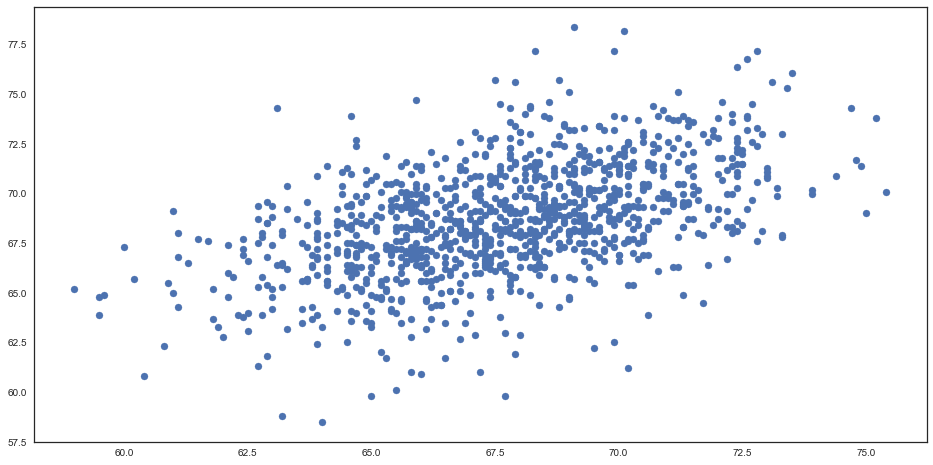

In [27]:
plt.scatter(pearson['Father'], pearson['Son'])
plt.show()

In [28]:
print('Mean father: ', np.mean(pearson['Father']))
print('Var father: ', np.var(pearson['Father']))

print('Mean son: ', np.mean(pearson['Son']))
print('Var son: ', np.var(pearson['Son']))

Mean father:  67.68682745825602
Var father:  7.532572309746968
Mean son:  68.68423005565862
Var son:  7.923591754124466


## Variance and covariance

**Definitie: Variance** 
$$Var(X) = E(X -EX)^2$$

**Definition: Covariance between two random variables**
$$Cov(X,Y) = E[(X-EX)(Y-EY)]$$


### Sample variance and covariance

Using Plugin Principle, we employ the theoretical definition by engaging sample values. 

Suppose that we have two samples: $x = \{x_1, x_2, ..., x_n\}$ and $y = \{y_1, y_2, ...y_n\}$, both i.i.d. samples.

**Definition: sample variance**

$$ Var(X) = \frac{1}{n} \sum_{i=1}^{n} ( x_i - \mu_x)^2$$

**Definition: sample covariance**

$$ Cov(X,Y) = \frac{1}{n} \sum_{i=1}^{n} ( x_i - \mu_x)(y_i - \mu_y)$$



### Correlation

**Definition: Correlation**

$$Cor(X,Y) = \frac{E[(X-EX)(Y-EY)]}{\sqrt{Var(X)}\sqrt{Var(Y)}}$$

Observations: 

* each term is positive if deviation of x observation from it's mean have the same sign as the deviation of the y observation from it's mean.

* the maximum is achieved when the relation is linear (Why?)

* the correlation have values between $[-1,1]$. (Why?)

* the name of this coefficient is *Pearson's Correlation Coefficient*

### Spearman Correlation

* Similar with Pearson's correlation, but valid also for non-linear relationships
* How is computed: 
    * Compute ranks for values, duplicate ranks share the same value. 
    * Now use ranks instead of values, and compute Pearson's Correlation on ranks
    
* Why works for nonlinear?

## Linear regression

**Linear regression** is a linear approach for modeling the relationship between a scalar dependent variable $y$ and one or more explanatory variables (or independent variables) denoted $X$.

### Motivation

* Simple to implement and fit
* Provides intuitive interpretation
* Basis for many other models
* Use data with a high efficiency

## Regression model

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... \beta_p x_p + \epsilon$

In matrix notation we have:

$y = X\beta + \epsilon$

* interpretation
* what is the meaning of the intercept 
* types of independent variables
* $e \sim Normal(0, \sigma^2)$ where $\epsilon_i$ are i.i.d.
* least mean squares as a fitting method

## Fit with least mean squares

Objective (loss) function:

$RSS(\epsilon) = ||\epsilon||_2^2 = \sum_{i=1}^{n} e_i^2$.

Since $\epsilon_i = y_i - X\beta$ we have

$RSS(\epsilon) = ||y - X\beta||_2^2 = (y - X\beta)^T(y-X\beta)$

Taking derivative of $\beta$ and equal with 0 leads to *normal equations*:

$\hat{\beta} = (X^TX)^{-1}X^Ty$

* $\hat{\beta}$ estimator of $\beta$
* predicted values are $\hat{y} = X\hat{\beta} = X(X^TX)^{-1}X^Ty$

## Geometric interpretation

![Geometric interpretation](geometric_interpretation.png 'Geometric interpretation')

## Statistical interpretation

Everything up until now was mechanical, based on linear algebra. We simply optimized a linear equation based on least mean squares. What about statistical content?

We assume: 

* errors $\epsilon_i$ are uncorrelated and have constant variance $\sigma^2$.

We want to study the properties of sample estimator $\hat{\beta}$

### Unbiased estimator I

We found $\hat{\beta} = (X^TX)^{-1}X^Ty$ and we know that $y = X\beta + \epsilon$.

We then have

$\hat{\beta} = (X^TX)^{-1}X^T (X\beta + \epsilon) = (X^TX)^{-1}X^TX\beta + (X^TX)^{-1}X^T\epsilon$

$\hat{\beta} = \beta + (X^TX)^{-1}X^T\epsilon$

$\hat{\beta}$ is a linear expression of real parameter $\beta$.


### Unbiased estimator II

$E[\hat{\beta}] = E[\beta] + E[(X^TX)^{-1}X^T\epsilon]$

We have two cases:

* we consider $X$ as fixed variable, thus

$E[\hat{\beta}] = E[\beta] + (X^TX)^{-1}X^TE[\epsilon]$, and we assumed that $\epsilon \sim N(0, \sigma^2)$

* we consider $X$ as random variable and we have

$E[\hat{\beta}] = E[\beta] + (X^TX)^{-1}E[X^T\epsilon]$, and we use the fact that $\epsilon$ are independent, which means they are independent of $X$ also. 

In both cases we have that $E[\hat{\beta}] = E[\beta]$, an unbiased estimator.

### Variance of linear estimator

We found that $\hat{\beta}$ is $\beta$ with some white noise around. We are interested, using that noise, to find the variance of the estimator. We take the variance-covariance of error in betas

$Var(\hat{\beta}) = E[(\hat{\beta}-\beta)(\hat{\beta} - \beta)^T]$.

We use the fact that $\hat{\beta} = \beta - (X^TX)^{-1}X^T\epsilon$ so we have

$Var(\hat{\beta}) = E[(X^TX)^{-1}X^T\epsilon((X^TX)^{-1}X^T\epsilon)^T]$

$Var(\hat{\beta}) = E[(X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-T}]$

We know however that $Var(\epsilon) = \sigma^2$. Thus we have

$Var(\hat{\beta}) = E[(X^TX)^{-1}X^T\sigma^2 I X(X^TX)^{-T}] = \sigma^2 (X^TX)^{-1}X^TX(X^TX)^{-T}$

$Var(\hat{\beta}) = \sigma^2 (X^TX)^{-1}$



### Inferences about coefficients

Thus we conclude that $\hat{\beta} \sim Normal(\beta, \sigma^2 (X^TX)^{-1})$ and we tipically estimate $\sigma^2$ from sample as 

$\hat{\sigma}^2 = \frac{1}{N - p - 1}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

We can, then, test for things like $\hat{\beta} = 0$, and using normal distribution assumptions we can compute:

* p values for individual $\beta_i$
* confidence intervals
* standard errors

## Assesing model accuracy

Once we have rejected the null hypothesis that $\beta != 0$ it is natural to ask ourselves *the extend to which the moel fits the data*. This is done using usually two statistics:

* residual standard error - the average amount that response will deviate from the true regression line

$RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}$

* $R^2$ statistic - the proportion of variance explained

$R^2 = \frac{TSS - RSS}{RSS} = 1 - \frac{RSS}{TSS}$

where 

$TSS = \sum(y_i - \bar{y})^2$

$RSS = \sum(y_i - \hat{y}_i)^2$

## Simple Linear Regression

We first study the case of one dependent variable:

$y = \beta_0 + \beta_1 x_1 + \epsilon$

We first investigate the effect of father's heights on son's heights.

In [29]:
lm1 = smf.ols('Father ~ Son', pearson).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Father   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     360.9
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           1.27e-69
Time:                        16:49:33   Log-Likelihood:                -2462.1
No. Observations:                1078   AIC:                             4928.
Df Residuals:                    1076   BIC:                             4938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1249      1.768     19.300      0.000      30.656      37.594
Son            0.4886      0.026     18.997      0.000       0.438       0.539
==============================================================================
Omnibus:                        0.700   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.765
Skew:                          -0.056   Prob(JB):                        0.682
Kurtosis:                       2.934   Cond. No.                     1.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

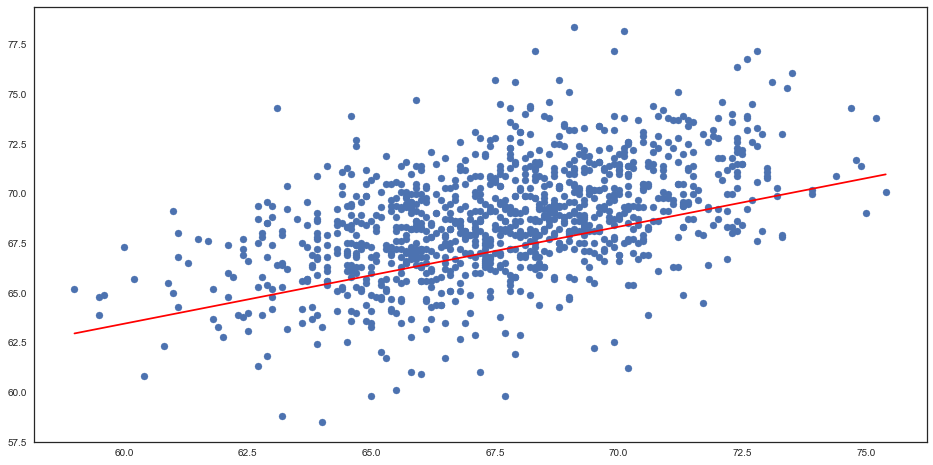

In [30]:

x = np.linspace(np.min(pearson['Father']), np.max(pearson['Father']), 10)
y = x*lm1.params[1] + lm1.params[0]

plt.scatter(pearson['Father'], pearson['Son'])
plt.plot(x, y, color = 'red')
plt.show()

### Advertising data set

We are interested in questioning the effect 3 types of investments on sales.

In [31]:
adv = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv')
adv.to_csv('./advertising.csv', index=False)
adv = pd.read_csv('./advertising.csv', index_col=0)
adv.head(10)

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8


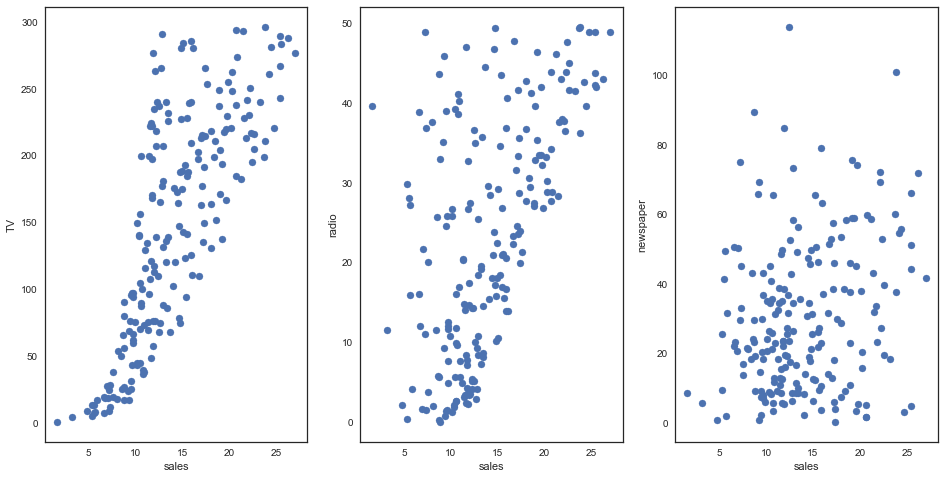

In [32]:
plt.subplot(131)
plt.scatter(adv['sales'], adv['TV'])
plt.xlabel('sales')
plt.ylabel('TV')

plt.subplot(132)
plt.scatter(adv['sales'], adv['radio'])
plt.xlabel('sales')
plt.ylabel('radio')

plt.subplot(133)
plt.scatter(adv['sales'], adv['newspaper'])
plt.xlabel('sales')
plt.ylabel('newspaper')

plt.show()

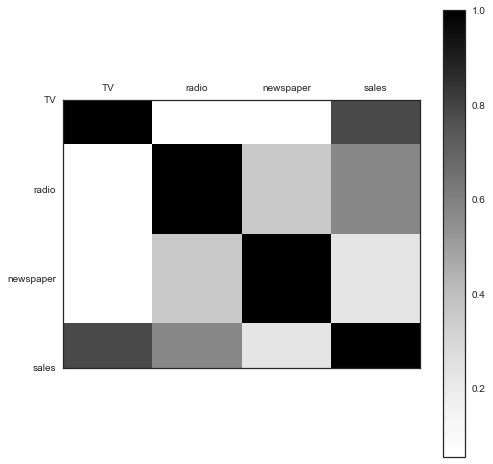

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [33]:

plt.matshow(adv.corr())
plt.xticks(range(len(adv.columns)), adv.columns)
plt.yticks(range(len(adv.columns)), adv.columns)
plt.colorbar()
plt.show()

print(adv.corr())


In [34]:
# How well TV predicts Sales

lm2 = smf.ols('sales ~ TV', data=adv).fit()
print(lm2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


In [35]:
# How well Radio predicts Sales

lm3 = smf.ols('sales ~ radio', data=adv).fit()
print(lm3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [36]:
# How well Newspaper predicts Sales

lm3 = smf.ols('sales ~ newspaper', data=adv).fit()
print(lm3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [37]:
# How well all predicts Sales

lm4= smf.ols('sales ~ TV + radio + newspaper', data=adv).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        16:49:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

* How do we interpret the insignificance of newspaper coefficient?
* Why this is happening?
* How do we test the model, using individual p-values or via F statistic?

### Linear regression typical problems

* Colinearity and multiple colinearity
* Relaxing the linearity assumption
* Qualitative variables
* Variance heteroscedasticity 


### Colinearity and multiple colinearity

Let's suppose we add two new variables to advertising data set:

* *TV2* = TV + small white noise
* *RadioNewspaper* = Radio + Newspaper

In [38]:
adv2 = adv.copy()
adv2['TV2'] = adv['TV'] + np.random.normal(size=adv.shape[0], loc=0, scale=10)
adv2['radionewspaper'] = adv['radio'] + adv['newspaper']

adv2.corr()

,TV,radio,newspaper,sales,TV2,radionewspaper
TV,1.000000,0.054809,0.056648,0.782224,0.992888,0.067366
radio,0.054809,1.000000,0.354104,0.576223,0.056007,0.742235
newspaper,0.056648,0.354104,1.000000,0.228299,0.056288,0.889547
sales,0.782224,0.576223,0.228299,1.000000,0.777932,0.445074
TV2,0.992888,0.056007,0.056288,0.777932,1.000000,0.067693
radionewspaper,0.067366,0.742235,0.889547,0.445074,0.067693,1.000000


In [39]:
lm5 = smf.ols('sales ~  TV + radio + newspaper + TV2 + radionewspaper', data=adv2).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.6
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           4.04e-95
Time:                        16:49:57   Log-Likelihood:                -386.17
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9370      0.313      9.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = pd.DataFrame(adv2).drop('sales', 1)

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

print(vif)

# now we remove RadioNewspaper

X = pd.DataFrame(adv2).drop('sales', 1).drop('radionewspaper', 1)

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

print(vif)

# now we remove also TV2

X = pd.DataFrame(adv2).drop('sales', 1).drop('radionewspaper', 1).drop('TV2', 1)

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

print(vif)

          vif        features
0  278.265475              TV
1         inf           radio
2         inf       newspaper
3  278.633578             TV2
4         inf  radionewspaper
          vif   features
0  278.265475         TV
1    3.289129      radio
2    3.055463  newspaper
3  278.633578        TV2
        vif   features
0  2.486772         TV
1  3.285462      radio
2  3.055245  newspaper


### Relaxing additive assumptions

Using TV and Radio to predict Sales assumes that the contribution of those variables are independent to the result.

It is possible that when investing in Radio, the TV investments to increase also. Thus, the investments are not linearly additive. We can investigate that using interaction terms.

An interaction term is the product of two features which takes into account the common contribution.

The other original terms are, thus, named base terms.

In [42]:
print(smf.ols('sales ~ TV + radio', data=adv).fit().summary())
print(smf.ols('sales ~ TV + radio + TV*radio', data=adv).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           4.83e-98
Time:                        16:50:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

### Relaxing additive assumptions

We can also include any other transformation of the input features, thus producing non linear contributions. The regression remains linear in coefficients, but non linear in inputs. A natural extension using those transformations is called *polynomial regression*.

In [43]:
print(smf.ols('sales ~ TV', data=adv).fit().summary())
print(smf.ols('sales ~ TV + I(log(TV))', data=adv).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           1.47e-42
Time:                        16:50:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

### Qualitative variables

What happens when we have qualitative independent variables?



In [53]:
credit = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Credit.csv', index_col=0)
credit.to_csv('./credit.csv', index=False)

credit = pd.read_csv('./credit.csv')

credit.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [54]:
print(smf.ols('Balance~Ethnicity', data=credit).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 07 Nov 2019   Prob (F-statistic):              0.957
Time:                        17:00:25   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531

Fitting equation is:

$y = \beta_0 + \beta_1 Etn.Asian + \beta_2 Etn.Caucasian + \epsilon$

How do we interpret?

* $\beta_0$ baseline for African American
* $\beta_0 + \beta_1$ debt for Asian
* $\beta_0 + \beta_2$ debt for Caucasian

## Variance heteroscedasticity

**heteroscedasticity** comes from Greek (*hetero* = different, *skedasis* = dispersion).

Thus it means we have multiple populations with different variances. It is the opposite of **homoscedasticity**. 

We can solve that if we would knew the variance of each observation, by weighting the observations. This leads to weighted linear regression.

**Weighted linear regression**

Instead of minimizing RSS = $y-X\beta)^2$ we aim to minimize $W(y-X\beta)^2$ where $W$ is the diagonal matrix with weights $w_{i,i} = 1/\hat{\sigma}_i$

We obtain:

$$\hat{\beta} = (X^TWX)^{-1}X^TWy$$

Show derivation!

## Regularization

The concept of regularization comes from the need to make the fitting more stable and manageable.

Let's take an artificial example where we fit some y to 10 dependent variables with high coliniearities.

We will proceed with a linear regression and follow the coefficients.

Why the coefficients explode?

In [55]:
df = pd.DataFrame()
df['y'] = np.arange(100)
df['x1'] = -np.arange(100) + np.random.normal(0, 1, 100)
df['x2'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x3'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x4'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x5'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x6'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x7'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x8'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x9'] = df['x1'] + np.random.normal(0, 0.0001, 100)
df['x10'] = df['x1'] + np.random.normal(0, 0.0001, 100)

smf.ols('y ~ x1+x2+x3+x4+x5+x6+x7+x8+x9+x10', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7201.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          7.50e-125
Time:                        17:00:29   Log-Likelihood:                -143.30
No. Observations:                 100   AIC:                             308.6
Df Residuals:                      89   BIC:                             337.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1052      0.222      0.475      0.636      -0.335       0.546
x1         -2458.6169   3512.565     -0.700      0.486   -9438.009    4520.775
x2          -321.4999   1102.851     -0.292      0.771   -2512.842    1869.842
x3          1295.0944   1174.079      1.103      0.273   -1037.775    3627.964
x4          1151.7296   1204.275      0.956      0.341   -1241.139    3544.598
x5           782.3504   1185.457      0.660      0.511   -1573.127    3137.828
x6           421.6667   1059.408      0.398      0.692   -1683.354    2526.687
x7          1204.2900   1124.901      1.071      0.287   -1030.864    3439.444
x8         -1247.5235   1044.441     -1.194      0.235   -3322.806     827.759
x9         -1727.5220   1188.863     -1.453      0.150   -4089.767     634.723
x10          899.0365   1074.388      0.837      0.405   -1235.749    3033.822
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.449
Skew:                          -0.057   Prob(JB):                        0.799
Kurtosis:                       2.692   Cond. No.                     6.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regularization: ridge regression

A natural way to make that stable is to impose constraints on coefficients. 

Problem:

$\underset{\beta}{argmin} ||y - X\beta||_2^2$

$\text{subject to } ||\beta||_2^2 < t$

This is translated using Lagrange multipliers into

$\underset{\beta}{argmin} ||y-X\beta||_2^2 + \lambda ||\beta||_2^2$

This is called ridge regression. The closed formula for estimating $\beta$ is

$$\hat{\beta} = (X^TX + \lambda I)^{-1}X^Ty$$

## Regularization: Elastic net

We can add also L1 penalty or a combination of both.

Problem:

$\underset{\beta}{argmin} ||y - X\beta||_2^2$

$\text{subject to } \alpha||\beta||_1 + (1-\alpha)||\beta||_2^2 < t$

This is translated using Lagrange multipliers into

$\underset{\beta}{argmin} ||y-X\beta||_2^2 + \alpha \lambda ||\beta||_1 + (1-\alpha) \lambda ||\beta||_2^2$


In [56]:

Y = adv2['sales']
X = adv2.drop('sales', 1)

print(sm.OLS(Y,X).fit().params)

mat = []
alphas = np.arange(0, 11, 1)
for alpha in alphas:
    mod = sm.OLS(Y,X)
    rslt = mod.fit_regularized(alpha=alpha, L1_wt=0)
    mat.append(rslt.params)
mat = pd.DataFrame(mat, index=[str(x) for x in alphas])
print(mat.T)

TV                0.047716
radio             0.142463
newspaper        -0.062836
TV2               0.006134
radionewspaper    0.079627
dtype: float64
              0         1         2         3         4         5         6  \
0  4.771593e-02  0.047323  0.046944  0.046580  0.046230  0.045892  0.045566   
1 -3.944290e+13  0.141856  0.141254  0.140659  0.140069  0.139486  0.138908   
2 -3.944290e+13 -0.062339 -0.061848 -0.061361 -0.060880 -0.060404 -0.059932   
3  2.806235e-02  0.006554  0.006958  0.007348  0.007724  0.008087  0.008438   
4  3.944290e+13  0.079517  0.079407  0.079298  0.079189  0.079082  0.078976   

          7         8         9        10  
0  0.045252  0.044949  0.044656  0.044373  
1  0.138336  0.137769  0.137208  0.136652  
2 -0.059465 -0.059004 -0.058546 -0.058094  
3  0.008777  0.009105  0.009422  0.009729  
4  0.078870  0.078766  0.078662  0.078559  
